Feed Forward Neural Network that takes the iris.csv dataset as input


In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the Iris dataset

iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a feedforward neural network model
model = keras.Sequential([
    layers.Input(shape=(4,)),          # Input layer with 4 features
    layers.Dense(16, activation='relu'), # Hidden layer with 16 neurons and ReLU activation
    layers.Dense(3, activation='softmax') # Output layer with 3 neurons for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy*100:.2f}%")




Epoch 1/100
4/4 - 1s - loss: 1.0789 - accuracy: 0.5000 - 1s/epoch - 302ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0456 - accuracy: 0.5583 - 16ms/epoch - 4ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0127 - accuracy: 0.5750 - 18ms/epoch - 5ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9846 - accuracy: 0.5750 - 21ms/epoch - 5ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9577 - accuracy: 0.5833 - 15ms/epoch - 4ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9330 - accuracy: 0.5750 - 20ms/epoch - 5ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9092 - accuracy: 0.5750 - 18ms/epoch - 5ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8871 - accuracy: 0.5750 - 17ms/epoch - 4ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8677 - accuracy: 0.5750 - 18ms/epoch - 5ms/step
Epoch 10/100
4/4 - 0s - loss: 0.8473 - accuracy: 0.5750 - 20ms/epoch - 5ms/step
Epoch 11/100
4/4 - 0s - loss: 0.8304 - accuracy: 0.5667 - 16ms/epoch - 4ms/step
Epoch 12/100
4/4 - 0s - loss: 0.8137 - accuracy: 0.5750 - 16ms/epoch - 4ms/step
Epoch 13/100
4/4 - 0s - loss: 0.7975 - accuracy: 

Simple Recurrent Neural Network to predict the stock prices is given below:


[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
63/63 [==============================] - 2s 3ms/step - loss: 0.0761
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 7.0408e-04
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 2.3042e-04
Epoch 8/50
63/63 [==============================] - 0s 3ms/step - loss: 1.0687e-04
Epoch 9/50
63/63 [==============================] - 0s 3ms/step - loss: 8.1191e-05
Epoch 10/50
63/63 [==============================] - 0s 3ms/step - loss: 7.6437e-05
Epoch 11/50
63/63 [==============================] - 0s 3ms/step - loss: 7.5016e-05
Epoch 12/50
63/63 [=================

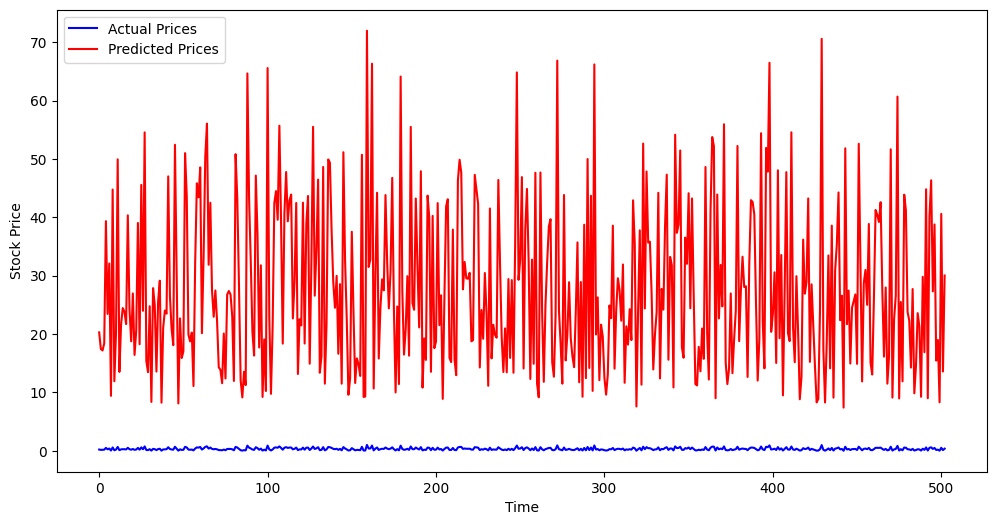

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the stock symbol and time period
stock_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2020-01-01'

# Fetch historical stock price data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Extract the closing stock price
data = stock_data['Close'].values.reshape(-1, 1)

# Normalize the data to be in the range [0, 1]
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split the data into training and testing sets
X = data[:-1]
y = data[1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(1, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the RNN model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions = scaler.inverse_transform(predictions)

# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Back Propagation Neural Network to Predict Diabetes is given below:

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the PIMA Indian Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Separate features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a BPNN model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/100
62/62 [==============================] - 2s 3ms/step - loss: 0.6659 - accuracy: 0.6368
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6220 - accuracy: 0.6531
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5871 - accuracy: 0.6775
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.6808
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5382 - accuracy: 0.7052
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5206 - accuracy: 0.7101
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5076 - accuracy: 0.7231
Epoch 8/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4957 - accuracy: 0.7313
Epoch 9/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4866 - accuracy: 0.7508
Epoch 10/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.7606
Epoch 11/

Convolution Neural Network for Image Classification is given below:


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
# CONVULATION IMAGE RECOGNITION
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be in the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Reshape the data to have a single channel (grayscale images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/5
750/750 [==============================] - 21s 26ms/step - loss: 0.3505 - accuracy: 0.8939 - val_loss: 0.0764 - val_accuracy: 0.9754
Epoch 2/5
750/750 [==============================] - 20s 26ms/step - loss: 0.1154 - accuracy: 0.9670 - val_loss: 0.0507 - val_accuracy: 0.9848
Epoch 3/5
750/750 [==============================] - 20s 27ms/step - loss: 0.0785 - accuracy: 0.9777 - val_loss: 0.0416 - val_accuracy: 0.9872
Epoch 4/5
750/750 [==============================] - 24s 32ms/step - loss: 0.0631 - accuracy: 0.9822 - val_loss: 0.0422 - val_accuracy: 0.9878
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0316 - accuracy: 0.9894
Test Accuracy: 98.94%
